# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [17]:
!pip install gym==0.26.2 matplotlib numpy


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

class CustomFrozenLakeEnv(FrozenLakeEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def step(self, action):
        state, reward, done, a,b = super().step(action)
        row, col = divmod(state, self.ncol)
        tile = self.desc[row][col].decode("utf-8")
        if tile == 'H':
            reward = -1  # Assign custom reward for falling into a hole
        return state, reward, done,a,b

# Usage
env = CustomFrozenLakeEnv(is_slippery=True, render_mode="ansi")

state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

## Training Loop
Complete the training loop

In [19]:

def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        finished = False
        reward_accum = 0

        while not finished:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, finished, _, _ = env.step(action)

            max_next = np.max(Q[next_state])
            Q[state, action] += alpha * (reward + gamma * max_next - Q[state, action])

            state = next_state
            reward_accum += reward

        epsilon *= decay
        alpha /= (1 + decay * episode)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward Collected: {reward_accum}, Epsilon: {epsilon:.3f}")

        rewards.append(reward_accum)

    return rewards


## Plotting Results

Episode 0, Reward Collected: -1.0, Epsilon: 0.995
Episode 100, Reward Collected: -1.0, Epsilon: 0.603
Episode 200, Reward Collected: -1.0, Epsilon: 0.365
Episode 300, Reward Collected: -1.0, Epsilon: 0.221
Episode 400, Reward Collected: 1.0, Epsilon: 0.134
Episode 500, Reward Collected: -1.0, Epsilon: 0.081
Episode 600, Reward Collected: -1.0, Epsilon: 0.049
Episode 700, Reward Collected: -1.0, Epsilon: 0.030
Episode 800, Reward Collected: 1.0, Epsilon: 0.018
Episode 900, Reward Collected: 1.0, Epsilon: 0.011
Episode 1000, Reward Collected: -1.0, Epsilon: 0.007
Episode 1100, Reward Collected: 1.0, Epsilon: 0.004
Episode 1200, Reward Collected: 1.0, Epsilon: 0.002
Episode 1300, Reward Collected: 1.0, Epsilon: 0.001
Episode 1400, Reward Collected: 1.0, Epsilon: 0.001
Episode 1500, Reward Collected: -1.0, Epsilon: 0.001
Episode 1600, Reward Collected: 1.0, Epsilon: 0.000
Episode 1700, Reward Collected: -1.0, Epsilon: 0.000
Episode 1800, Reward Collected: 1.0, Epsilon: 0.000
Episode 1900, 

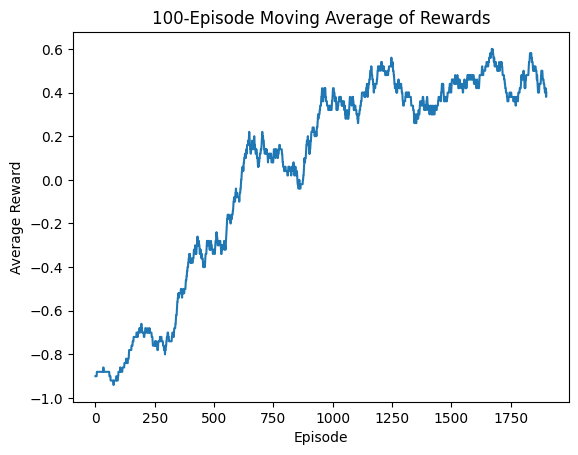

In [20]:
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## Test the Learned Policy

In [21]:
def test_agent(Q, episodes=5):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            env.render()
            state = next_state



In [22]:
test_agent(Q)

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5


## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


## TLDR

Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.

